In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sys

## Вспомогательные методы

График кластеров и их центров

In [2]:
def draw_clusters(df, x_column, y_column, cluster_column, x_c, y_c, title):
    facet = sns.lmplot(data=df, x=x_column, y=y_column, hue=cluster_column, 
                   fit_reg=False, legend=True, legend_out=True)
    plt.scatter(x_c, y_c, c='darkmagenta', s=150, marker='X')
    plt.title(title)

Расстояние между 2 точками

In [3]:
def dist(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

Инициализация центров

In [4]:
def create_centers(x, y, k):
    x_cc = np.mean(x)
    y_cc = np.mean(y)
    R = max(dist(x[i], y[i], x_cc, y_cc) for i in range(n))
    x_c, y_c = [], []
    for i in range(k):
        x_c.append(R * np.cos(2 * np.pi * i / k) + x_cc)
        y_c.append(R * np.sin(2 * np.pi * i / k) + y_cc)
    return x_c, y_c

Построение кластеров

In [5]:
def cluster(k, x, y, x_c, y_c):
    clusters = []
    for i in range(len(x)):
        min_dist = dist(x[i], y[i], x_c[0], y_c[0])
        min_num = 0
        for j in range(1, k):
            if min_dist > dist(x[i], y[i], x_c[j], y_c[j]):
                min_dist = dist(x[i], y[i], x_c[j], y_c[j])
                min_num = j
        clusters.append(min_num)
    return clusters

Сумма квадратов расстояний от точек до центров их классов

In [6]:
def calculate_j(k, df, x_c, y_c):
    j = 0
    for c in range(k):
        for i in range(len(x)):
            if df['cluster'][i] == c:
                j += dist(df['x'][i], df['y'][i], x_c[c], y_c[c])**2
    return j

Перерасчет центров кластеров

In [7]:
def recal_c(x, y, x_c, y_c, clust, k):
    for i in range(k):
        n = sum(el == i for el in clust)
        sum_x = sum(x[j] for j in range(len(clust)) if clust[j] == i)
        sum_y = sum(y[j] for j in range(len(clust)) if clust[j] == i)
        x_c[i] = sum_x / n if n != 0 else 0
        y_c[i] = sum_y / n if n != 0 else 0

## Главные методы

K-Means

In [8]:
def kmeans(k, x, y, sh_grph):
    n = len(x)
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    df['cluster'] = [0] * n
    if sh_grph: draw_clusters(df, 'x', 'y', 'cluster', None, None, '')
    x_c, y_c = create_centers(df['x'], df['y'], k)
    if sh_grph: draw_clusters(df, 'x', 'y', 'cluster', x_c, y_c, 'Начальные центры кластеров')
    while True:
        clusters = cluster(k, df['x'], df['y'], x_c, y_c)
        if np.array_equal(clusters, df['cluster']):
            break
        else:
            df['cluster'] = clusters
            if sh_grph: draw_clusters(df, 'x', 'y', 'cluster', x_c, y_c, 'Распределение точек по кластерам')
            recal_c(df['x'], df['y'], x_c, y_c, clusters, k)
            if sh_grph: draw_clusters(df, 'x', 'y', 'cluster', x_c, y_c, 'Перемещение центров кластеров')
    return df, x_c, y_c

Выбор числа кластеров

In [9]:
def cluster_count(x, y):
    d = []
    df, x_c, y_c = kmeans(1, x, y, False)
    j_pp = calculate_j(1, df, x_c, y_c)
    df, x_c, y_c = kmeans(2, x, y, False)
    j_p = calculate_j(2, df, x_c, y_c)
    for k in range(3, len(x)):
        df, x_c, y_c = kmeans(k, x, y, False)
        j = calculate_j(k, df, x_c, y_c)
        d.append(np.abs((j_p - j)/(j_pp - j_p)))
        j_pp = j_p
        j_p = j
    min_d = min(d)
    return [j + 2 for j in range(len(d)) if d[j] == min(d)]

In [10]:
def cluster_count_j(x, y, alpha):
    df, x_c, y_c = kmeans(1, x, y, False)
    old_j = calculate_j(1, df, x_c, y_c)
    for k in range(2, 50):
        df, x_c, y_c = kmeans(k, x, y, False)
        j = calculate_j(k, df, x_c, y_c)
        if old_j - j <= alpha:
            return k
        old_j = j
    return len(x)

## Пример

Данные

In [11]:
n, k = 100, 4

x = np.random.randint(1, 100, n)
y = np.random.randint(1, 100, n)

In [12]:
cluster_count(x, y)

[90]

In [13]:
cluster_count_j(x, y, 5)

19

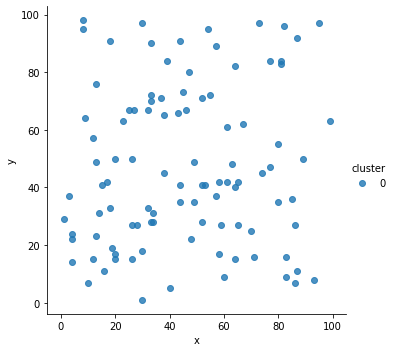

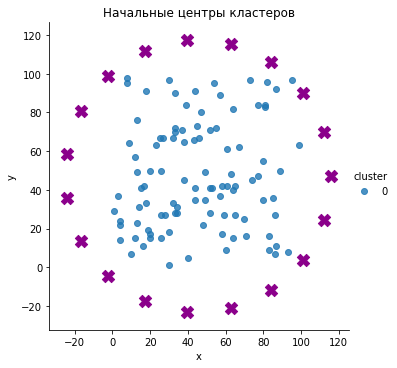

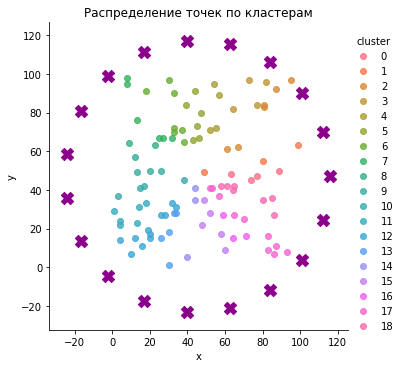

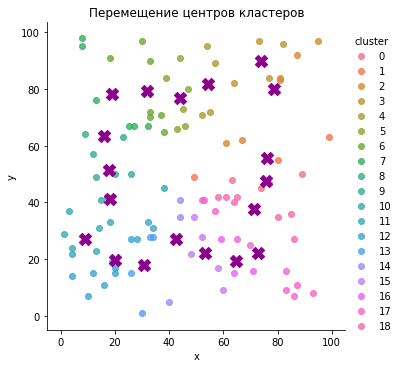

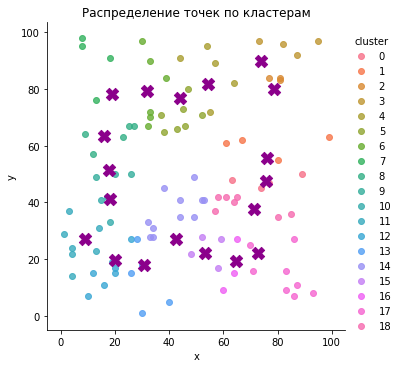

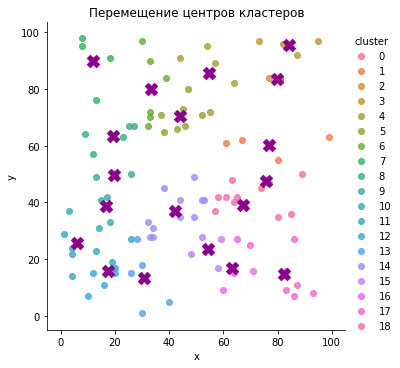

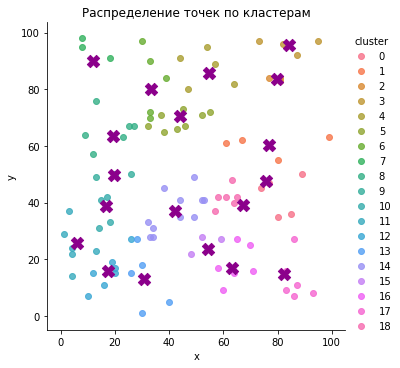

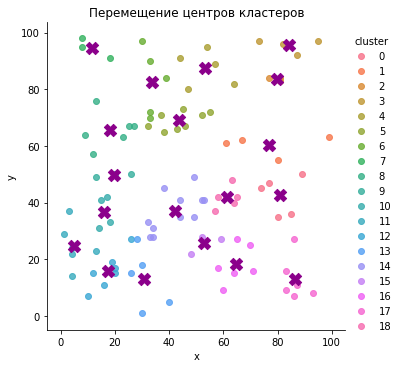

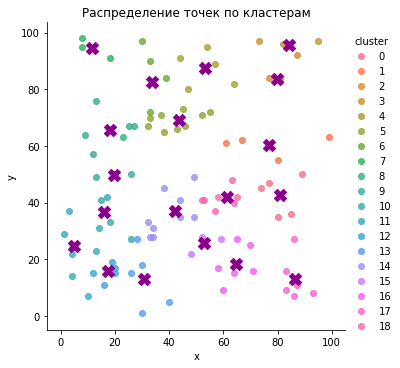

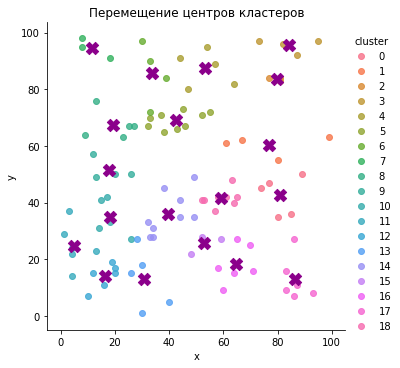

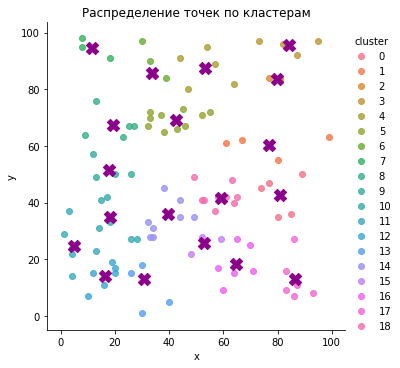

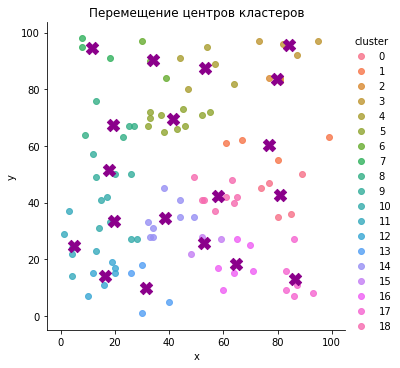

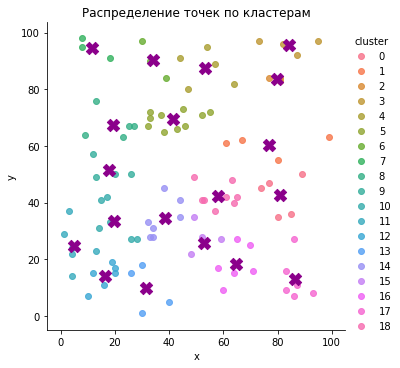

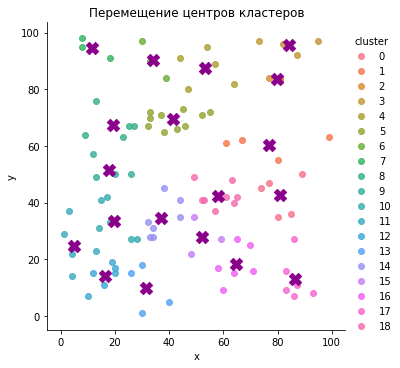

In [16]:
df, x_c, y_c = kmeans(19, x, y, True)

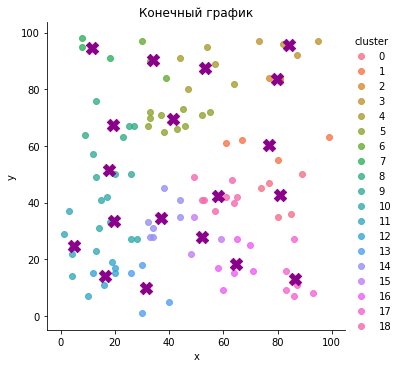

In [17]:
draw_clusters(df, 'x', 'y', 'cluster', x_c, y_c, 'Конечный график')